<a href="https://colab.research.google.com/github/takao8/MLTSA_JClifford/blob/master/HW5/HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 5 by Jon Clifford

# Task 1: setup and Data Retrieval

This step is straightforward: I downloaded the dataset from kaggle, unzipped, and got them into colab with pandas.read_csv

In [9]:
import json
import os
import pandas as pd
import numpy as np
import pylab as pl

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# mounting the google drive
from google.colab import drive

drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
# getting into the correst spot for the kaggle.json
cd gdrive/My\ Drive/

/content/gdrive/My Drive


In [0]:
!chmod 600 kaggle.json

In [0]:
envs = json.load(open("kaggle.json", "r"))       # opens our kaggle.json file
os.environ["KAGGLE_USERNAME"] = envs['username']   #gets our username from the json file
os.environ["KAGGLE_KEY"] = envs['key']     #gets our key

In [11]:
cd MLSTA1/

/content/gdrive/My Drive/MLSTA1


In [0]:
!mkdir HW5/

In [13]:
cd HW5/

/content/gdrive/My Drive/MLSTA1/HW5


In [16]:
cd data

/content/gdrive/My Drive/MLSTA1/HW5/data


In [19]:
# now that we're in the directory we want, we'll download and unzip
!kaggle competitions download -c PLAsTiCC-2018

 94% 135M/143M [00:01<00:00, 113MB/s]
100% 143M/143M [00:01<00:00, 134MB/s]
  0% 0.00/1.26M [00:00<?, ?B/s]
100% 1.26M/1.26M [00:00<00:00, 41.7MB/s]
 99% 679M/683M [00:05<00:00, 107MB/s]
100% 683M/683M [00:05<00:00, 125MB/s]
 98% 671M/682M [00:05<00:00, 136MB/s]
100% 682M/682M [00:05<00:00, 130MB/s]
100% 681M/684M [00:06<00:00, 112MB/s]
100% 684M/684M [00:06<00:00, 115MB/s]
100% 681M/682M [00:08<00:00, 46.9MB/s]
100% 682M/682M [00:08<00:00, 83.2MB/s]
100% 682M/682M [00:15<00:00, 37.6MB/s]
100% 682M/682M [00:15<00:00, 45.5MB/s]
 97% 107M/110M [00:00<00:00, 112MB/s] 
100% 110M/110M [00:01<00:00, 113MB/s]
 99% 677M/682M [00:08<00:00, 122MB/s]
100% 682M/682M [00:08<00:00, 83.8MB/s]
100% 680M/682M [00:10<00:00, 41.1MB/s]
100% 682M/682M [00:10<00:00, 66.4MB/s]
100% 6.80G/6.80G [02:03<00:00, 101MB/s] 
100% 6.80G/6.80G [02:04<00:00, 58.9MB/s]
 48% 10.0M/20.7M [00:00<00:00, 98.3MB/s]
100% 20.7M/20.7M [00:00<00:00, 101MB/s] 
100% 683M/683M [00:06<00:00, 69.3MB/s]

100% 679M/682M [00:21<00:00, 19

In [24]:
!ls

data_note.pdf.zip	   test_set_batch4.csv.zip  test_set_metadata.csv.zip
sample_submission.csv.zip  test_set_batch5.csv.zip  test_set_sample.csv.zip
test_set_batch10.csv.zip   test_set_batch6.csv.zip  training_set.csv
test_set_batch11.csv.zip   test_set_batch7.csv.zip  training_set.csv.zip
test_set_batch1.csv.zip    test_set_batch8.csv.zip  training_set_metadata.csv
test_set_batch2.csv.zip    test_set_batch9.csv.zip
test_set_batch3.csv.zip    test_set.csv.zip


In [23]:
!unzip training_set.csv.zip

Archive:  training_set.csv.zip
replace training_set.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: training_set.csv        
unzip:  cannot find or open training_set_metadata.csv.zip, training_set_metadata.csv.zip.zip or training_set_metadata.csv.zip.ZIP.


# Task 2: Minor Data Preparation

Now that the data is downlaoded, I'll read in the 2 csv files we need and do minor prep for the notebook ahead.

In [0]:
lcvs = pd.read_csv("training_set.csv")

In [26]:
print("The dataset contains: (observations, columns)", lcvs.shape)

The dataset contains: (observations, columns) (1421705, 6)


In [27]:
lcvs.head()

,object_id,mjd,passband,flux,flux_err,detected
0,615,59750.4229,2,-544.810303,3.622952,1
1,615,59750.4306,1,-816.434326,5.553370,1
2,615,59750.4383,3,-471.385529,3.801213,1
3,615,59750.4450,4,-388.984985,11.395031,1
4,615,59752.4070,2,-681.858887,4.041204,1


In [32]:
bands = lcvs["passband"].unique()
print("Passbands (filter) identifiers:", bands)

Passbands (filter) identifiers: [2 1 3 4 5 0]


In [33]:
objects = lcvs["object_id"].unique()
print("There are {} astrophysical simulated objects in my dataset".format(objects.shape[0]))

There are 7848 astrophysical simulated objects in my dataset


In [29]:
metadata = pd.read_csv("training_set_metadata.csv")
metadata.head()

,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
0,615,349.046051,-61.943836,320.796530,-51.753706,1,0.0000,0.0000,0.0000,NaN,0.017,92
1,713,53.085938,-27.784405,223.525509,-54.460748,1,1.8181,1.6267,0.2552,45.4063,0.007,88
2,730,33.574219,-6.579593,170.455585,-61.548219,1,0.2320,0.2262,0.0157,40.2561,0.021,42
3,745,0.189873,-45.586655,328.254458,-68.969298,1,0.3037,0.2813,1.1523,40.7951,0.007,90
4,1124,352.711273,-63.823658,316.922299,-51.059403,1,0.1934,0.2415,0.0176,40.4166,0.024,90


In [30]:
metadata.columns

Index(['object_id', 'ra', 'decl', 'gal_l', 'gal_b', 'ddf', 'hostgal_specz',
       'hostgal_photoz', 'hostgal_photoz_err', 'distmod', 'mwebv', 'target'],
      dtype='object')

In [31]:
print("The metadata dataset contains more information for each time series: (time-series, columns)", metadata.shape)

The metadata dataset contains more information for each time series: (time-series, columns) (7848, 12)


# Task 3: Data Visualization

In [0]:
norm_band = Normalize(vmin=bands.min(), vmax=bands.max())

615


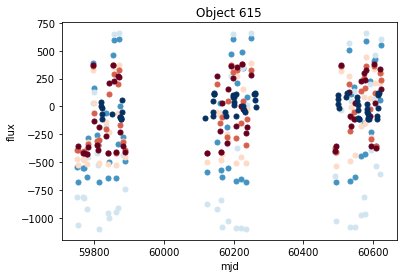

745


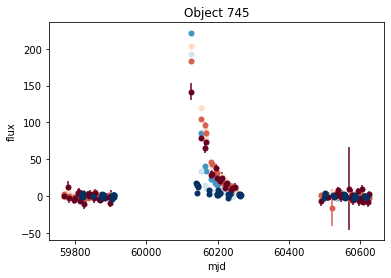

1227


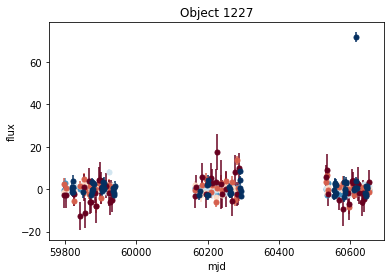

2072


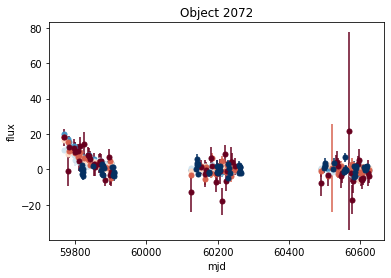

2103


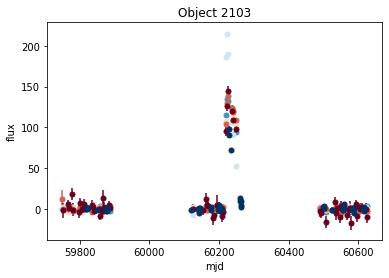

84716


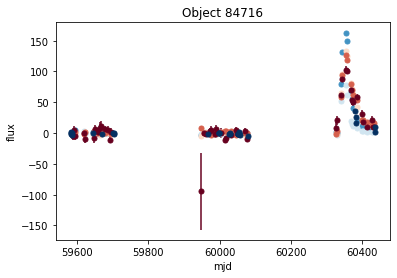

2300


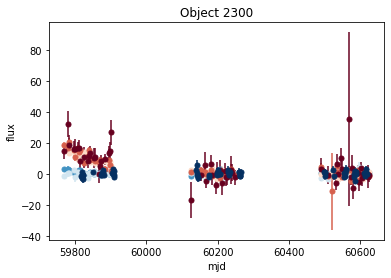

2330


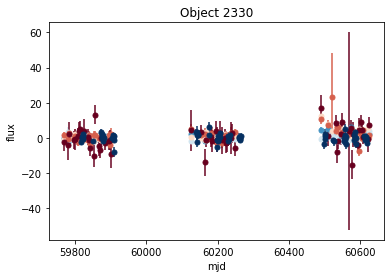

2624


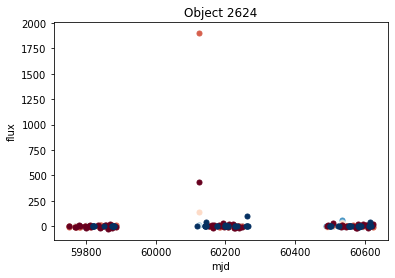

2677


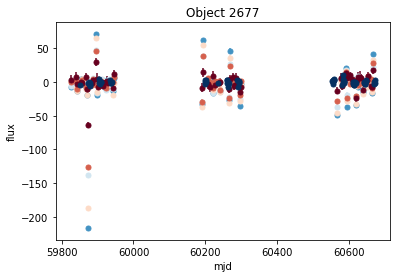

In [270]:
a = lcvs.loc[lcvs["object_id"]==objects[0]]
a.head()
for o in [objects[0], objects[3], objects[5], objects[10], objects[11], 84716, 
          objects[12], objects[13], objects[14], objects[15]]:
  for d in bands:
    a = lcvs.loc[(lcvs["object_id"]==o) & (lcvs["passband"]==d)]
    pl.errorbar(a["mjd"], a["flux"], yerr=a["flux_err"], 
      color=[pl.cm.RdBu_r(Normalize(vmin=bands.min(), vmax=bands.max())(c)) for c in bands][d-1], 
      fmt='.', ms=10, mew=1)
    pl.title("Object %s" % o)
    pl.ylabel("flux")
    pl.xlabel("mjd")
  pl.show()

Figure 1: Time series plots of multiple objects and their flux and errors.  Note that the x-axis is time, represented by the label mjd.  Note also the colorcode indicates which band each datapoint is in: points that are more red are in lower bands, while points that are more blue are in higher bands.

# Task 4: Extract Features

# 4.1

After finishing this homework, I realize I wish I had more time to work on this and the t-SNE, but for this week I don't, so I only added the minimum 6 variables needed.  They are:

Original lightcurve: 3rd (skewness) and 4th (kurtosis) moments.

Standardized lightcurve: median, straight line fit.


Metadata: decl, ddf.

# 4.2 - Extracting from the Original Lightcurve

Here we'll extract the 3rd and 4th moments from the standard lightcurve.  I realize that getting the other statistics are straightforward, but for the interest of time I only got those 2.

In [0]:
from scipy import stats 
def m3(x):   # skewness
    return stats.moment(x, moment = 3)
def m4(x):   # kurtosis
    return stats.moment(x, moment = 4)
mom3 = lcvs.groupby(["object_id", "passband"]).flux.apply(m3)
mom4 = lcvs.groupby(["object_id", "passband"]).flux.apply(m4)

In [289]:
#pd.DataFrame(mom4).rename({"flux": "m3"}, axis=1)
features = pd.concat([mom3, mom4], axis=1)
features.columns=["m3", "m4"]
features.head()

m3            m4
object_id passband                            
615       0         7.266579e+04  7.433032e+07
          1         8.593916e+07  2.215166e+11
          2         3.040627e+07  6.659406e+10
          3         1.049664e+07  1.919999e+10
          4         4.717542e+06  1.036570e+10

# 4.3 - Standardizing Lightcurve and Extracting Features

In this step, we standardize the dataset using groupby and apply, then add our median and linfit statistics.

In [0]:
lcvs["fluxnormed"] = 0.

In [0]:
def normed(df):
   df["fluxnormed"] = (df.flux - df.mean().flux)/df.std().flux
   return df
lcvsnorm = lcvs.groupby(["object_id", "passband"]).apply(normed)

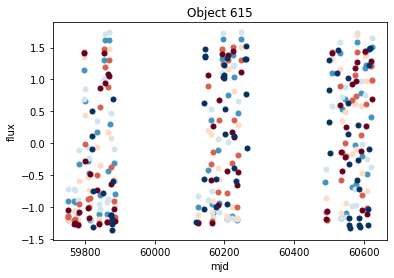

In [343]:
for d in bands:
    a = lcvsnorm.loc[(lcvsnorm["object_id"]==615) & (lcvsnorm["passband"]==d)]
    pl.errorbar(a["mjd"], a["fluxnormed"], 
      color=[pl.cm.RdBu_r(Normalize(vmin=bands.min(), vmax=bands.max())(c)) for c in bands][d-1], 
      fmt='.', ms=10, mew=1)
    pl.title("Object 615")
    pl.ylabel("flux")
    pl.xlabel("mjd")
pl.show()

Figure 2: Verification normalization worked.  Comparison to the same object in Figure 1 confirms the same shape with different magnitude.  I couldn't figure out why the colors didn't match, but the shapes do match and for purposes of the notebook is all that matters.

In [0]:
medians = lcvsnorm.groupby(["object_id", "passband"])[["fluxnormed"]].median()
features["medians"] = medians

In [0]:
def linfit(x):
    pars = np.polyfit(range(len(x)), x["fluxnormed"].values, 1)
    return pars
linfits = lcvsnorm.groupby(["object_id", "passband"]).apply(linfit)

In [0]:
slopes = [x[0] for x in linfits.values[:]]
intercepts = [x[1] for x in linfits.values[:]]
features["slopes"] = slopes
features["intercepts"] = intercepts

In [298]:
features.head()

m3            m4   medians    slopes  intercepts
object_id passband                                                            
615       0         7.266579e+04  7.433032e+07 -0.080537  0.005676   -0.175947
          1         8.593916e+07  2.215166e+11 -0.170090  0.014032   -0.399902
          2         3.040627e+07  6.659406e+10 -0.289021  0.017676   -0.503760
          3         1.049664e+07  1.919999e+10 -0.122434  0.020475   -0.583524
          4         4.717542e+06  1.036570e+10 -0.163078  0.022343   -0.636786

Thus we verify that our statistics are added correctly.

# Task 5 - Unstacking the features and adding Metadata

Note as said before that we're adding decl and ddf from the metadata file.  We make final adjustments to our features dataset and add these variables before moving on.

In [0]:
allfeatures = features.reset_index().set_index(['object_id','passband']).stack(
    ).unstack([1,2])

In [317]:
allfeatures = allfeatures.merge(metadata[["decl", "object_id"]], left_on="object_id", right_on="object_id")
allfeatures = allfeatures.merge(metadata[["ddf", "object_id"]], left_on="object_id", right_on="object_id")
allfeatures = allfeatures.merge(metadata[["target", "object_id"]], left_on="object_id", right_on="object_id")

/usr/local/lib/python3.6/dist-packages/pandas/core/reshape/merge.py:618: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


In [321]:
allfeatures.head()

,object_id,"(0, m3)","(0, m4)","(0, medians)","(0, slopes)","(0, intercepts)","(1, m3)","(1, m4)","(1, medians)","(1, slopes)","(1, intercepts)","(2, m3)","(2, m4)","(2, medians)","(2, slopes)","(2, intercepts)","(3, m3)","(3, m4)","(3, medians)","(3, slopes)","(3, intercepts)","(4, m3)","(4, m4)","(4, medians)","(4, slopes)","(4, intercepts)","(5, m3)","(5, m4)","(5, medians)","(5, slopes)","(5, intercepts)",decl,ddf,target
0,615,72665.792850,7.433032e+07,-0.080537,0.005676,-0.175947,8.593916e+07,2.215166e+11,-0.170090,0.014032,-0.399902,3.040627e+07,6.659406e+10,-0.289021,0.017676,-0.503760,1.049664e+07,1.919999e+10,-0.122434,0.020475,-0.583524,4.717542e+06,1.036570e+10,-0.163078,0.022343,-0.636786,3.041829e+06,1.049535e+10,-0.129163,0.021319,-0.596932,-61.943836,1,92
1,713,89.634243,4.907398e+03,-0.052914,-0.041433,1.429423,-1.551087e+01,1.944373e+03,0.080189,-0.051648,1.420320,-4.127475e+00,1.935955e+03,0.117188,-0.053887,1.481892,-4.249286e+01,3.091660e+03,0.141552,-0.050983,1.402038,-1.597455e+01,2.938985e+03,0.016870,-0.050464,1.387765,7.377121e+01,5.294322e+03,-0.094281,-0.037903,1.042343,-27.784405,1,88
2,730,2.093148,3.655013e+01,0.039463,-0.001798,0.063840,2.623669e+00,3.870188e+01,0.016754,0.003167,-0.080770,3.864890e+02,6.926529e+03,-0.343392,0.026905,-0.686084,1.380135e+03,4.048490e+04,-0.314425,0.024491,-0.624531,2.936931e+03,1.060595e+05,-0.308522,0.022552,-0.563811,3.751336e+03,1.860606e+05,-0.149763,0.019612,-0.490299,-6.579593,1,42
3,745,162.368381,2.575248e+03,-0.169349,-0.013089,0.464675,1.161627e+05,2.162844e+07,-0.185994,-0.003826,0.105205,1.758302e+05,3.606109e+07,-0.290606,-0.003878,0.106641,1.519142e+05,2.575691e+07,-0.373246,-0.003931,0.108112,1.190633e+05,1.781661e+07,-0.358773,-0.004774,0.131296,5.309464e+04,6.203072e+06,-0.306851,-0.002816,0.076043,-45.586655,1,90
4,1124,-4.160853,1.101222e+02,-0.033864,0.017117,-0.530614,1.202103e+03,3.545471e+04,-0.429236,0.028666,-0.816982,2.827915e+04,2.468546e+06,-0.438785,0.025384,-0.723449,6.198814e+04,7.271993e+06,-0.383411,0.021342,-0.608237,7.183273e+04,9.005039e+06,-0.303771,0.019736,-0.562470,3.414365e+04,3.279413e+06,-0.229697,0.015555,-0.435534,-63.823658,1,90


# Task 6: Creating the Train-Test sets

First we check for NaNs and Infinities, as they can mess up evaluation in our dataset.

In [322]:
# check for NaNs and infinities
print("there are {} NaN and {} infinity entries".format(
 (allfeatures.isna().sum().sum()), np.prod(allfeatures.shape) - (np.isfinite(allfeatures).sum().sum())))

there are 0 NaN and 0 infinity entries


In my case, I don't need to make any adjustments

In [0]:
X = allfeatures.iloc[:,:-1]
y = allfeatures.iloc[:,-1]


In [0]:
import sklearn
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=8)

In [325]:
from sklearn import preprocessing
Xtrain_scaled = preprocessing.scale(X_train)
Xtest_scaled = preprocessing.scale(X_test)

print("scaled training data feature mean and standard deviations: ", 
      Xtrain_scaled.mean(axis=0), Xtrain_scaled.std(axis=0))

scaled training data feature mean and standard deviations:  [ 6.33835683e-17  0.00000000e+00 -1.29354221e-18  1.77862054e-17
 -1.61692776e-17  1.29354221e-17  1.29354221e-18  2.58708442e-18
 -5.17416884e-18 -5.17416884e-18 -1.81095909e-17 -1.29354221e-18
  5.17416884e-18 -1.94031331e-17 -1.03483377e-17  6.46771105e-18
 -3.23385552e-18 -3.23385552e-18 -2.58708442e-17 -1.55225065e-17
  9.70156657e-19 -5.82093994e-18 -3.88062663e-18  1.09951088e-17
  1.45523499e-18 -4.52739773e-18 -5.17416884e-18  2.58708442e-18
  9.05479547e-18  1.42289643e-17 -1.94031331e-17  2.13434465e-17
  2.29603742e-17] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1.]


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


# Task 7: Implementing t-SNE

Here we'll implement t-SNE to show separation in our data clearly from our 34-dimensional set down to 2.

In [0]:
from sklearn.manifold import TSNE

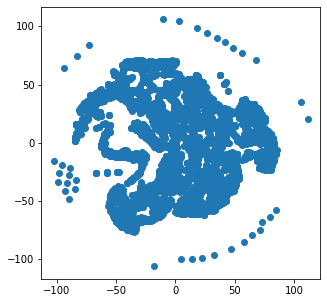

In [331]:
X_embedded = TSNE(n_components=2, random_state=345).fit_transform(X)
X_embedded.shape
pl.figure(figsize=(5,5))
pl.scatter(X_embedded[:,0], X_embedded[:,1])
pl.show()

Figure 3: Illustration of the t-SNE projection from 34 dimensions down to 2.  Optimally, we would like to see seperation into seperate clusters down in 2 dimensions, as it would indicate distancing in the higher dimensional paramter space.  In our plot we see clear signs of groups forming, from the snake in the midle left portion to the extension on the right side.

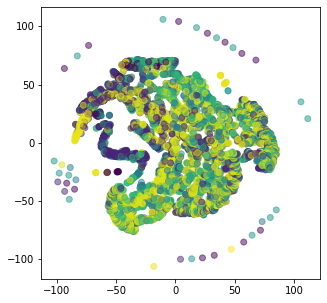

In [329]:
norm_obj= Normalize(vmin=y.min(), vmax=y.max())
len([c for c in pl.cm.RdBu_r(norm_obj(y.values))]), X_embedded.shape
pl.figure(figsize=(5,5))
pl.scatter(X_embedded[:,0], X_embedded[:,1],  
           color=[c for c in pl.cm.viridis(norm_obj(y.values))], alpha=0.5);

Figure 4: Similar to Figure 3, except colorcoded based on the target variable.  For this instance, the plot doesn't show much more from the colorcoding.

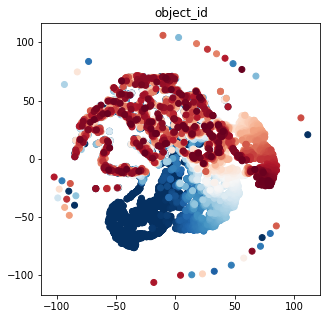

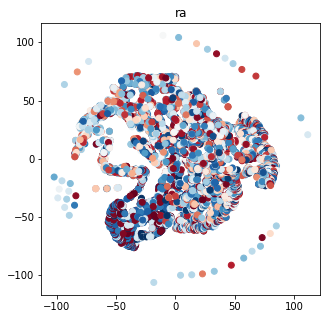

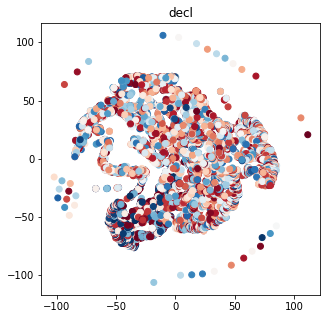

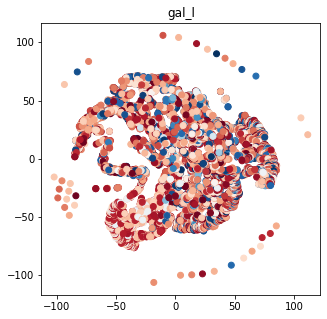

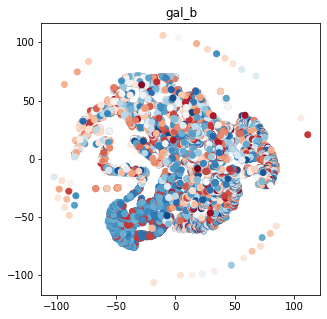

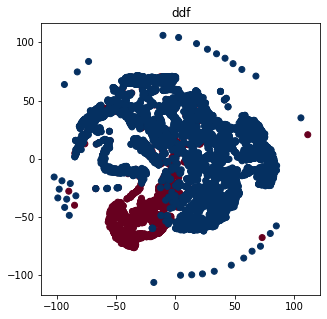

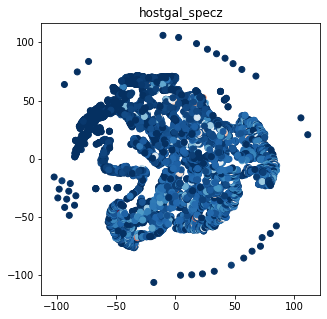

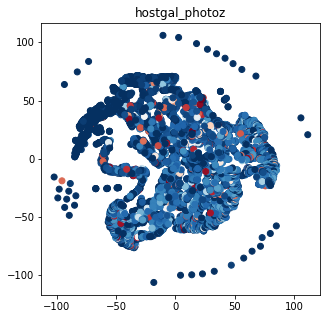

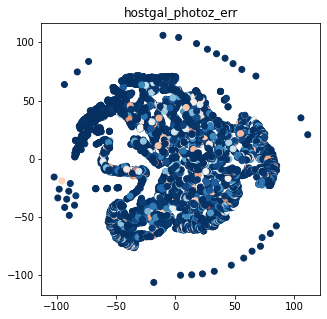

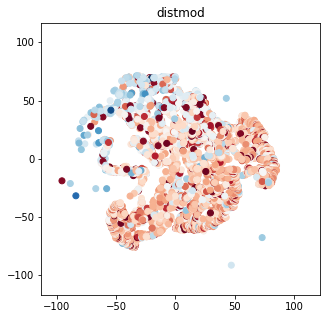

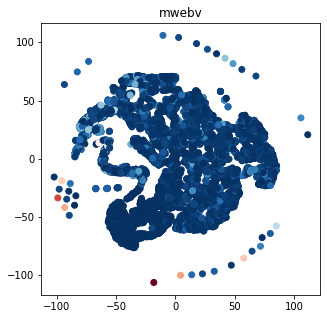

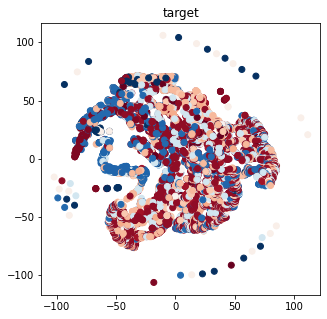

In [330]:
for col in metadata.columns:
    v = metadata[col].astype(float)
    pl.figure(figsize=(5,5))
    pl.title(col)
    pl.scatter(X_embedded[:,0], X_embedded[:,1],  color=[pl.cm.RdBu_r(Normalize(vmin=v.min(), vmax=v.max())(c))
                                                         for c in v])

    pl.show()

Figure 5: An extension of the colorcoding done in Figure 4 to all other variables in Metadata.  Note the object_id, ddf, and distmod plots show extensive seperation in the data, and in application purposes would be vitally important in our analysis: object_id shows seperation in the top and bottom half, ddf shows separation in an individual group in the bottom left, and distmod shows separation in individuals at the top of the plot.

I want to say informally that this method is really cool, and I'll be playing around with this more in the future.